In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
pd.set_option('display.max_columns',None)
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.naive_bayes import GaussianNB

In [3]:
df=pd.read_csv("Term Deposit.csv",sep=';')

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
df.skew()

C:\Users\WELCOME\AppData\Local\Temp\ipykernel_2964\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


age               0.784697
duration          3.263141
campaign          4.762507
pdays            -4.922190
previous          3.832042
emp.var.rate     -0.724096
cons.price.idx   -0.230888
cons.conf.idx     0.303180
euribor3m        -0.709188
nr.employed      -1.044262
dtype: float64

<AxesSubplot:>

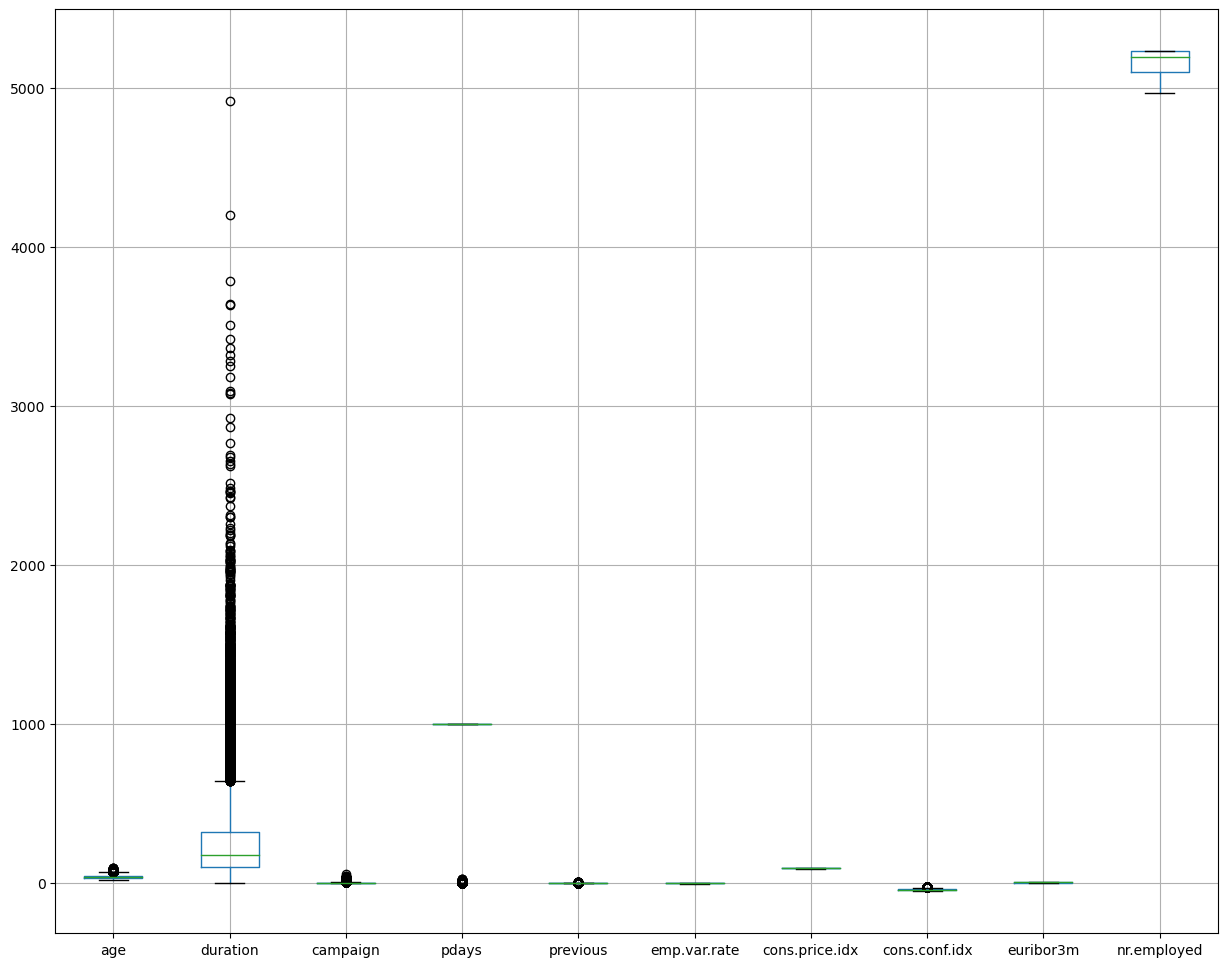

In [7]:
plt.figure(figsize=(15,12))
df.boxplot()

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y', ylabel='count'>

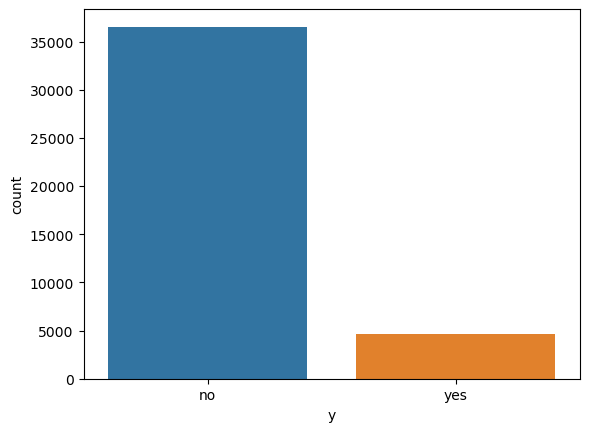

In [8]:
sns.countplot(df['y'])

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='job', ylabel='count'>

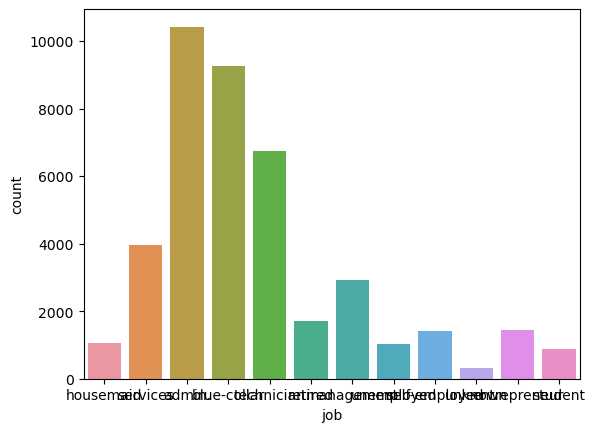

In [9]:
sns.countplot(df['job'])

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='marital', ylabel='count'>

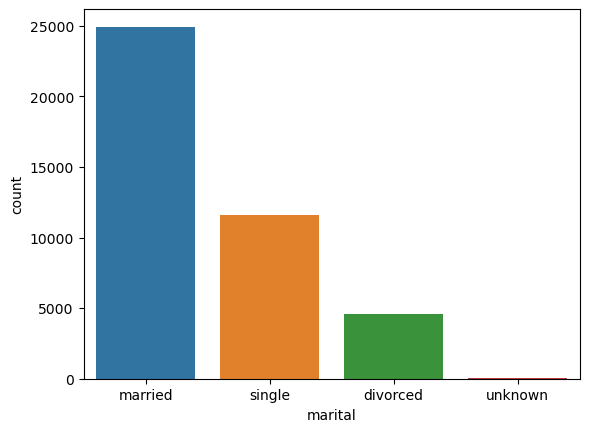

In [10]:
sns.countplot(df['marital'])

In [11]:
df['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

We have to impute the missing values because there are much values for unknown

In [12]:
dfob=df.select_dtypes(object)

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AxesSubplot(0.125,0.11;0.775x0.77)


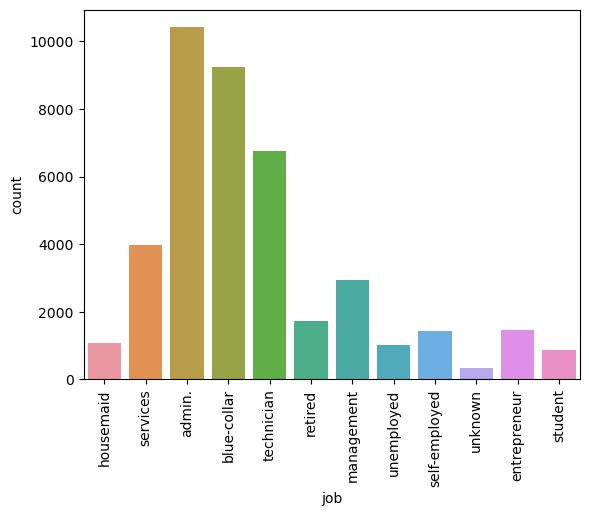

AxesSubplot(0.125,0.11;0.775x0.77)


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


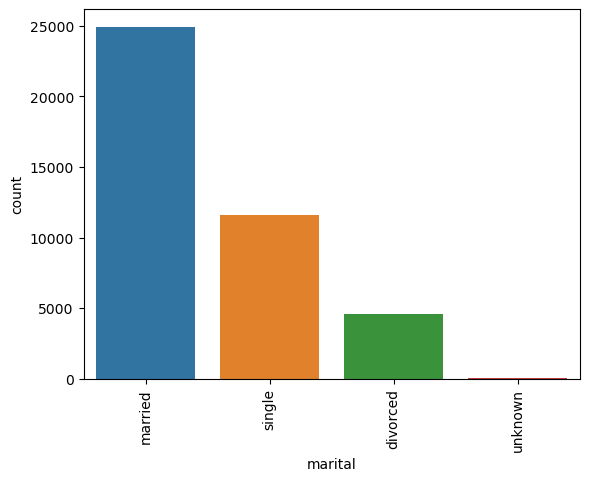

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AxesSubplot(0.125,0.11;0.775x0.77)


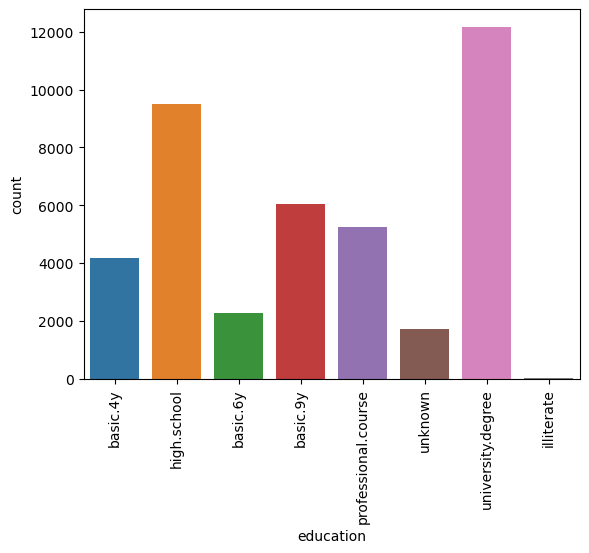

AxesSubplot(0.125,0.11;0.775x0.77)


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


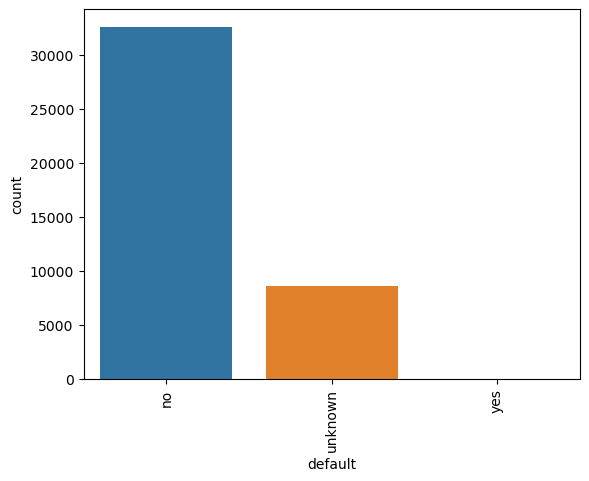

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AxesSubplot(0.125,0.11;0.775x0.77)


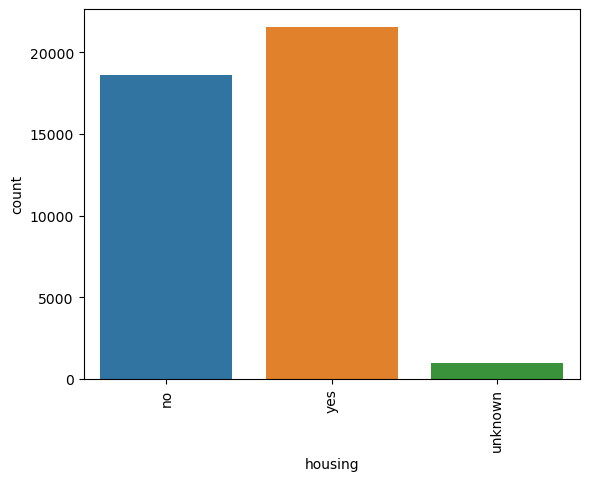

AxesSubplot(0.125,0.11;0.775x0.77)


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


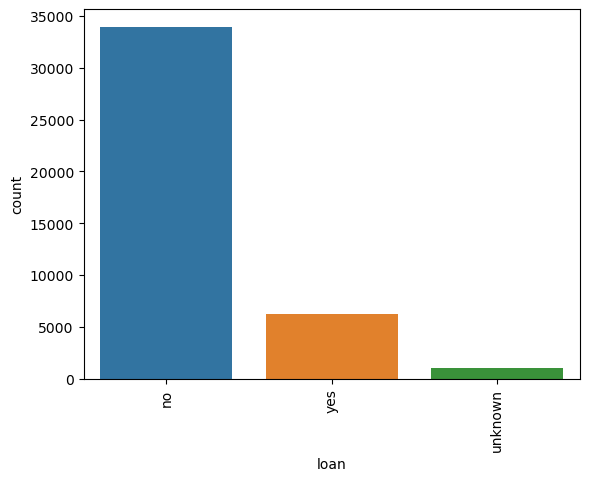

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AxesSubplot(0.125,0.11;0.775x0.77)


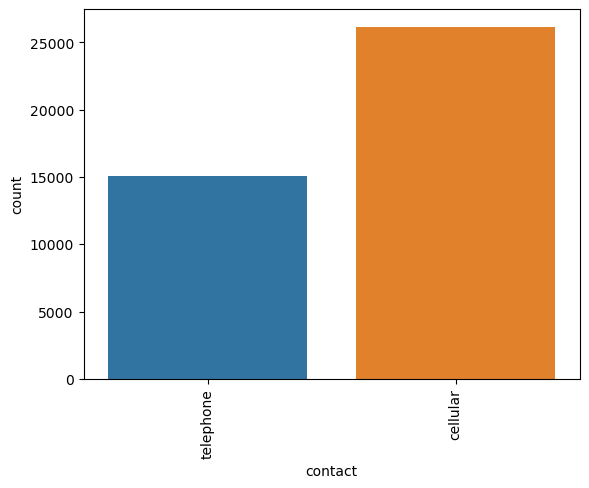

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AxesSubplot(0.125,0.11;0.775x0.77)


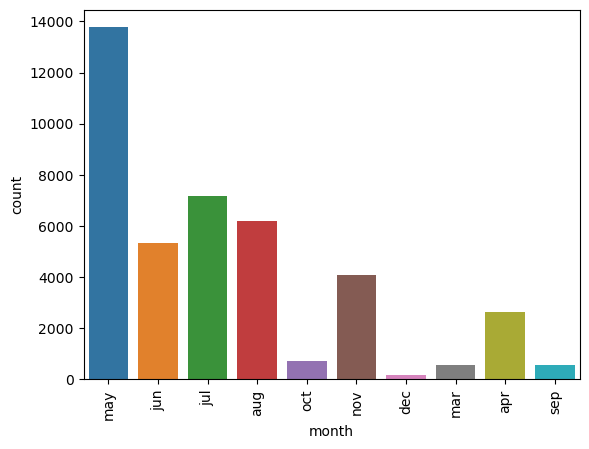

AxesSubplot(0.125,0.11;0.775x0.77)


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


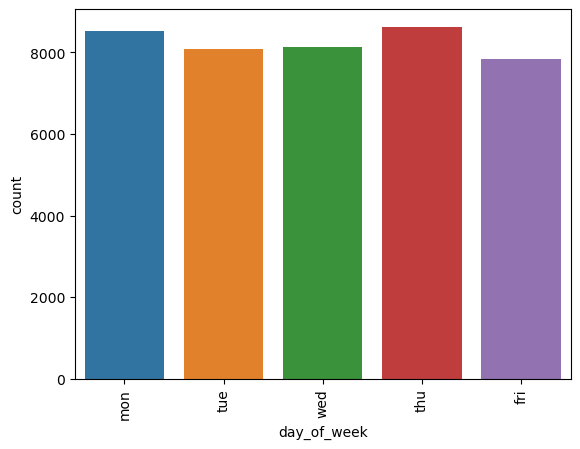

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AxesSubplot(0.125,0.11;0.775x0.77)


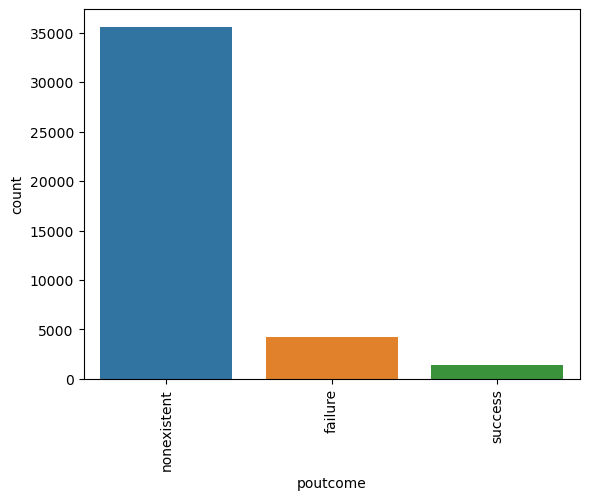

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AxesSubplot(0.125,0.11;0.775x0.77)


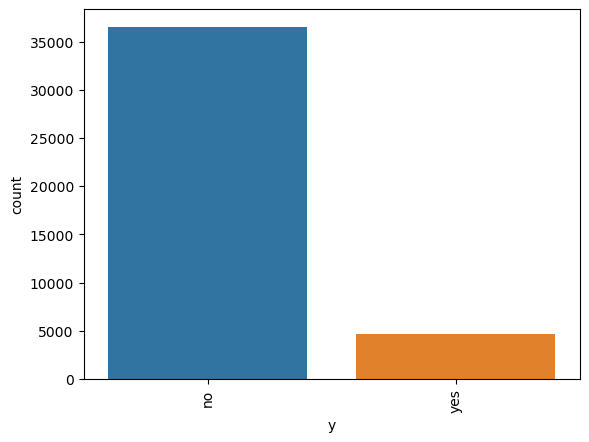

In [13]:
for i in dfob:
    plt.xticks(rotation=90)
    print(sns.countplot(df[i]))
    plt.show()

In [14]:
# sns.pairplot(df)

<AxesSubplot:>

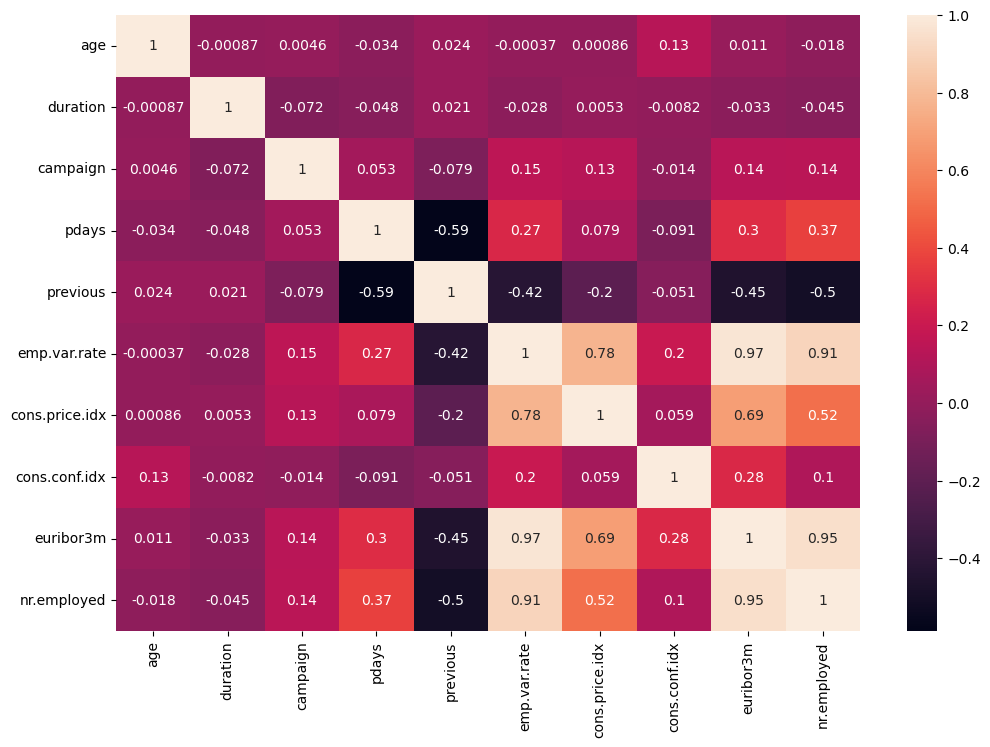

In [15]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

In [8]:
def chi_test(v1,v2):
    tab=pd.crosstab(v1,v2)
    _,p,_,_=chi2_contingency(tab)
    if p<=0.05:
        print("Accept the alternate Hypothesis",round(p,2))
    else:
        print("Failed to reject the null hypothesis",round(p,2))
    return tab

In [9]:
chi_test(df['job'],df['y'])

Accept the alternate Hypothesis 0.0


y,no,yes
job,,
admin.,9070,1352
blue-collar,8616,638
entrepreneur,1332,124
housemaid,954,106
management,2596,328
retired,1286,434
self-employed,1272,149
services,3646,323
student,600,275


In [10]:
chi_test(df['marital'],df['y'])

Accept the alternate Hypothesis 0.0


y,no,yes
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


In [11]:
chi_test(df['education'],df['y'])

Accept the alternate Hypothesis 0.0


y,no,yes
education,,
basic.4y,3748,428
basic.6y,2104,188
basic.9y,5572,473
high.school,8484,1031
illiterate,14,4
professional.course,4648,595
university.degree,10498,1670
unknown,1480,251


In [12]:
chi_test(df['default'],df['y'])

Accept the alternate Hypothesis 0.0


y,no,yes
default,,
no,28391,4197
unknown,8154,443
yes,3,0


In [13]:
chi_test(df['housing'],df['y'])

Failed to reject the null hypothesis 0.06


y,no,yes
housing,,
no,16596,2026
unknown,883,107
yes,19069,2507


In [14]:
chi_test(df['loan'],df['y'])

Failed to reject the null hypothesis 0.58


y,no,yes
loan,,
no,30100,3850
unknown,883,107
yes,5565,683


In [15]:
chi_test(df['contact'],df['y'])

Accept the alternate Hypothesis 0.0


y,no,yes
contact,,
cellular,22291,3853
telephone,14257,787


In [16]:
chi_test(df['month'],df['y'])

Accept the alternate Hypothesis 0.0


y,no,yes
month,,
apr,2093,539
aug,5523,655
dec,93,89
jul,6525,649
jun,4759,559
mar,270,276
may,12883,886
nov,3685,416
oct,403,315


In [17]:
chi_test(df['day_of_week'],df['y'])

Accept the alternate Hypothesis 0.0


y,no,yes
day_of_week,,
fri,6981,846
mon,7667,847
thu,7578,1045
tue,7137,953
wed,7185,949


In [18]:
chi_test(df['poutcome'],df['y'])

Accept the alternate Hypothesis 0.0


y,no,yes
poutcome,,
failure,3647,605
nonexistent,32422,3141
success,479,894


In [19]:
x=df.drop(['y'],axis=1)
y=df['y']

In [20]:
dfob=x.select_dtypes(object).columns

In [21]:
df_enc=pd.get_dummies(x,columns=dfob)

In [22]:
df_enc.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [23]:
df_enc.shape

(41188, 63)

In [24]:
le=LabelEncoder()
y_enc=le.fit_transform(y)

In [25]:
y_enc

array([0, 0, 0, ..., 0, 1, 0])

In [26]:
xtrain,xtest,ytrain,ytest=train_test_split(df_enc,y_enc,random_state=123,test_size=0.2)

In [27]:
xtrain.shape

(32950, 63)

In [28]:
log=LogisticRegression()

In [29]:
log.fit(xtrain,ytrain)
preds_train_log=log.predict(xtrain)
preds_test_log=log.predict(xtest)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
def report(actual,pred):
    acc_score=accuracy_score(actual,pred)
    con_mat=confusion_matrix(actual,pred)
    class_rep=classification_report(actual,pred)
    print("Accuracy of model is", round((acc_score*100),2),'%')
    print('\n ',con_mat)
    print('\n',class_rep)

In [31]:
report(ytrain,preds_train_log)
report(ytest,preds_test_log)

Accuracy of model is 90.93 %

  [[28497   753]
 [ 2236  1464]]

               precision    recall  f1-score   support

           0       0.93      0.97      0.95     29250
           1       0.66      0.40      0.49      3700

    accuracy                           0.91     32950
   macro avg       0.79      0.68      0.72     32950
weighted avg       0.90      0.91      0.90     32950

Accuracy of model is 91.27 %

  [[7124  174]
 [ 545  395]]

               precision    recall  f1-score   support

           0       0.93      0.98      0.95      7298
           1       0.69      0.42      0.52       940

    accuracy                           0.91      8238
   macro avg       0.81      0.70      0.74      8238
weighted avg       0.90      0.91      0.90      8238



In [32]:
rf=RandomForestClassifier(n_estimators=150,max_depth=5)
rf.fit(xtrain,ytrain)
preds_train_rf=rf.predict(xtrain)
preds_test_rf=rf.predict(xtest)

In [33]:
report(ytrain,preds_train_rf)
report(ytest,preds_test_rf)

Accuracy of model is 90.26 %

  [[29104   146]
 [ 3064   636]]

               precision    recall  f1-score   support

           0       0.90      1.00      0.95     29250
           1       0.81      0.17      0.28      3700

    accuracy                           0.90     32950
   macro avg       0.86      0.58      0.62     32950
weighted avg       0.89      0.90      0.87     32950

Accuracy of model is 90.36 %

  [[7265   33]
 [ 761  179]]

               precision    recall  f1-score   support

           0       0.91      1.00      0.95      7298
           1       0.84      0.19      0.31       940

    accuracy                           0.90      8238
   macro avg       0.87      0.59      0.63      8238
weighted avg       0.90      0.90      0.88      8238



In [34]:
ada=AdaBoostClassifier(n_estimators=100,learning_rate=0.987)
ada.fit(xtrain,ytrain)
preds_train_ada=ada.predict(xtrain)
preds_test_ada=ada.predict(xtest)

In [35]:
report(ytrain,preds_train_ada)
report(ytest,preds_test_ada)

Accuracy of model is 91.13 %

  [[28483   767]
 [ 2157  1543]]

               precision    recall  f1-score   support

           0       0.93      0.97      0.95     29250
           1       0.67      0.42      0.51      3700

    accuracy                           0.91     32950
   macro avg       0.80      0.70      0.73     32950
weighted avg       0.90      0.91      0.90     32950

Accuracy of model is 91.05 %

  [[7106  192]
 [ 545  395]]

               precision    recall  f1-score   support

           0       0.93      0.97      0.95      7298
           1       0.67      0.42      0.52       940

    accuracy                           0.91      8238
   macro avg       0.80      0.70      0.73      8238
weighted avg       0.90      0.91      0.90      8238



In [36]:
gb=GradientBoostingClassifier(n_estimators=150,learning_rate=0.9123)
gb.fit(xtrain,ytrain)
preds_train_gb=gb.predict(xtrain)
preds_test_gb=gb.predict(xtest)

In [37]:
report(ytrain,preds_train_gb)
report(ytest,preds_test_gb)

Accuracy of model is 92.32 %

  [[28285   965]
 [ 1567  2133]]

               precision    recall  f1-score   support

           0       0.95      0.97      0.96     29250
           1       0.69      0.58      0.63      3700

    accuracy                           0.92     32950
   macro avg       0.82      0.77      0.79     32950
weighted avg       0.92      0.92      0.92     32950

Accuracy of model is 91.28 %

  [[7007  291]
 [ 427  513]]

               precision    recall  f1-score   support

           0       0.94      0.96      0.95      7298
           1       0.64      0.55      0.59       940

    accuracy                           0.91      8238
   macro avg       0.79      0.75      0.77      8238
weighted avg       0.91      0.91      0.91      8238



In [38]:
np.sqrt(len(xtrain))

181.52134860671347

In [39]:
knn=KNeighborsClassifier(n_neighbors=201)
knn.fit(xtrain,ytrain)
preds_train_knn=knn.predict(xtrain)
preds_test_knn=knn.predict(xtest)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [40]:
report(ytrain,preds_train_knn)
report(ytest,preds_test_knn)

Accuracy of model is 91.22 %

  [[28240  1010]
 [ 1884  1816]]

               precision    recall  f1-score   support

           0       0.94      0.97      0.95     29250
           1       0.64      0.49      0.56      3700

    accuracy                           0.91     32950
   macro avg       0.79      0.73      0.75     32950
weighted avg       0.90      0.91      0.91     32950

Accuracy of model is 91.37 %

  [[7042  256]
 [ 455  485]]

               precision    recall  f1-score   support

           0       0.94      0.96      0.95      7298
           1       0.65      0.52      0.58       940

    accuracy                           0.91      8238
   macro avg       0.80      0.74      0.76      8238
weighted avg       0.91      0.91      0.91      8238



In [41]:
svc=SVC(kernel='poly',degree=6)
svc.fit(xtrain,ytrain)
preds_train_svc=svc.predict(xtrain)
preds_test_svc=svc.predict(xtest)

In [42]:
report(ytrain,preds_train_svc)
report(ytest,preds_test_svc)

Accuracy of model is 89.89 %

  [[28740   510]
 [ 2821   879]]

               precision    recall  f1-score   support

           0       0.91      0.98      0.95     29250
           1       0.63      0.24      0.35      3700

    accuracy                           0.90     32950
   macro avg       0.77      0.61      0.65     32950
weighted avg       0.88      0.90      0.88     32950

Accuracy of model is 89.96 %

  [[7179  119]
 [ 708  232]]

               precision    recall  f1-score   support

           0       0.91      0.98      0.95      7298
           1       0.66      0.25      0.36       940

    accuracy                           0.90      8238
   macro avg       0.79      0.62      0.65      8238
weighted avg       0.88      0.90      0.88      8238



In [43]:
svc.support_vectors_.shape

(6795, 63)

These are the support vectors that are near the margin

In [44]:
# %pip install imblearn

In [45]:
oversample=SMOTE()

In [46]:
xsmote,ysmote=oversample.fit_resample(df_enc,y_enc)

In [47]:
print(xsmote.shape)
print(ysmote.shape)

(73096, 63)
(73096,)


In [48]:
counter=Counter(ysmote)
print(counter)

Counter({0: 36548, 1: 36548})


We have to split the train and test data set again, because we have splitted it for the imbalanced dataset

In [49]:
xtrain_smote,xtest_smote,ytrain_smote,ytest_smote=train_test_split(xsmote,ysmote,random_state=123,test_size=0.2)

In [50]:
print(xtrain_smote.shape,xtest_smote.shape,ytrain_smote.shape,ytest_smote.shape)

(58476, 63) (14620, 63) (58476,) (14620,)


In [51]:
svc=SVC()

In [52]:
svc.fit(xtrain_smote,ytrain_smote)
preds_train_svc_smote=svc.predict(xtrain_smote)
preds_test_svc_smote=svc.predict(xtest_smote)

In [53]:
report(ytrain_smote,preds_train_svc_smote)
report(ytest_smote,preds_test_svc_smote)

Accuracy of model is 84.52 %

  [[24492  4739]
 [ 4313 24932]]

               precision    recall  f1-score   support

           0       0.85      0.84      0.84     29231
           1       0.84      0.85      0.85     29245

    accuracy                           0.85     58476
   macro avg       0.85      0.85      0.85     58476
weighted avg       0.85      0.85      0.85     58476

Accuracy of model is 84.68 %

  [[6168 1149]
 [1091 6212]]

               precision    recall  f1-score   support

           0       0.85      0.84      0.85      7317
           1       0.84      0.85      0.85      7303

    accuracy                           0.85     14620
   macro avg       0.85      0.85      0.85     14620
weighted avg       0.85      0.85      0.85     14620



In [54]:
nb=GaussianNB()

In [55]:
nb.fit(xtrain_smote,ytrain_smote)
preds_train_nb_smote=nb.predict(xtrain_smote)
preds_test_nb_smote=nb.predict(xtest_smote)

In [56]:
report(ytrain_smote,preds_train_nb_smote)
report(ytest_smote,preds_test_nb_smote)

Accuracy of model is 88.76 %

  [[25603  3628]
 [ 2946 26299]]

               precision    recall  f1-score   support

           0       0.90      0.88      0.89     29231
           1       0.88      0.90      0.89     29245

    accuracy                           0.89     58476
   macro avg       0.89      0.89      0.89     58476
weighted avg       0.89      0.89      0.89     58476

Accuracy of model is 88.69 %

  [[6434  883]
 [ 771 6532]]

               precision    recall  f1-score   support

           0       0.89      0.88      0.89      7317
           1       0.88      0.89      0.89      7303

    accuracy                           0.89     14620
   macro avg       0.89      0.89      0.89     14620
weighted avg       0.89      0.89      0.89     14620



In [57]:
nb.fit(xtrain,ytrain)
preds_train_nb=nb.predict(xtrain)
preds_test_nb=nb.predict(xtest)

In [58]:
report(ytrain,preds_train_nb)
report(ytest,preds_test_nb)

Accuracy of model is 86.34 %

  [[26527  2723]
 [ 1779  1921]]

               precision    recall  f1-score   support

           0       0.94      0.91      0.92     29250
           1       0.41      0.52      0.46      3700

    accuracy                           0.86     32950
   macro avg       0.68      0.71      0.69     32950
weighted avg       0.88      0.86      0.87     32950

Accuracy of model is 86.25 %

  [[6620  678]
 [ 455  485]]

               precision    recall  f1-score   support

           0       0.94      0.91      0.92      7298
           1       0.42      0.52      0.46       940

    accuracy                           0.86      8238
   macro avg       0.68      0.71      0.69      8238
weighted avg       0.88      0.86      0.87      8238



In [59]:
import pickle
import gradio as gr

In [60]:
with open('gradient_boost.pkl','wb') as f:
    pickle.dump(gb,f)

In [61]:
df_enc.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oc

In [65]:
def make_prediction(age, duration, campaign, pdays, previous, empvarrate,
       conspriceidx, consconfidx, euribor3m, nremployed,
       job_admin, job_bluecollar, job_entrepreneur, job_housemaid,
       job_management, job_retired, job_selfemployed, job_services,
       job_student, job_technician, job_unemployed, job_unknown,
       marital_divorced, marital_married, marital_single,
       marital_unknown, education_basic4y, education_basic6y,
       education_basic9y, education_highschool, education_illiterate,
       education_professionalcourse, education_universitydegree,
       education_unknown, default_no, default_unknown, default_yes,
       housing_no, housing_unknown, housing_yes, loan_no,
       loan_unknown, loan_yes, contact_cellular, contact_telephone,
       month_apr, month_aug, month_dec, month_jul, month_jun,
       month_mar, month_may, month_nov, month_oct, month_sep,
       day_of_week_fri, day_of_week_mon, day_of_week_thu,
       day_of_week_tue, day_of_week_wed, poutcome_failure,
       poutcome_nonexistent, poutcome_success
):
    
    with open('gradient_boost.pkl','rb') as f:
        clf=pickle.load(f)
        preds=clf.predict([[age, duration, campaign, pdays, previous, empvarrate,
       conspriceidx, consconfidx, euribor3m, nremployed,
       job_admin, job_bluecollar, job_entrepreneur, job_housemaid,
       job_management, job_retired, job_selfemployed, job_services,
       job_student, job_technician, job_unemployed, job_unknown,
       marital_divorced, marital_married, marital_single,
       marital_unknown, education_basic4y, education_basic6y,
       education_basic9y, education_highschool, education_illiterate,
       education_professionalcourse, education_universitydegree,
       education_unknown, default_no, default_unknown, default_yes,
       housing_no, housing_unknown, housing_yes, loan_no,
       loan_unknown, loan_yes, contact_cellular, contact_telephone,
       month_apr, month_aug, month_dec, month_jul, month_jun,
       month_mar, month_may, month_nov, month_oct, month_sep,
       day_of_week_fri, day_of_week_mon, day_of_week_thu,
       day_of_week_tue, day_of_week_wed, poutcome_failure,
       poutcome_nonexistent, poutcome_success]])
        if preds==0:
            return 'will not invest in term deposit'
        else:
            return 'will invest in term deposit'

In [71]:
age=gr.Number(label='enter age')
duration=gr.Number(label='enter duration')
campaign=gr.Number(label='enter campign')
pdays=gr.Number(label='enter pdays')
previous=gr.Number(label='enter previous')
empvarrate=gr.Number(label='enter empvarrate')
conspriceidx =gr.Number(label='enter conspriceidx')
consconfidx=gr.Number(label='enter consconfidx')
euribor3m=gr.Number(label='enter euribor3m')
nremployed=gr.Number(label='enter nremployed')
job_admin=gr.Number(label='whether job is admin')
job_bluecollar=gr.Number(label='whether job is bluecollar')
job_entrepreneur=gr.Number(label='whether job is euntreprenur')
job_housemaid=gr.Number(label='whether job is house maid')
job_management=gr.Number(label='whether job is management')
job_retired=gr.Number(label='whether job is retired')
job_selfemployed=gr.Number(label='whether job is self empoyed')
job_services=gr.Number(label='whether job is services')
job_student=gr.Number(label='whether job is student')
job_technician=gr.Number(label='whether job is technician')
job_unemployed=gr.Number(label='whether job is unemployed')
job_unknown=gr.Number(label='whether job is unkown')
marital_divorced=gr.Number(label='whether marital is divorced')
marital_married=gr.Number(label='whether marital is married')
marital_single=gr.Number(label='whether marital is single')
marital_unknown=gr.Number(label='whether marital is unknown')
education_basic4y=gr.Number(label='whether education is basic 4 year')
education_basic6y=gr.Number(label='whether education is basic 6 year')
education_basic9y=gr.Number(label='wether education is basic 9 year')
education_highschool=gr.Number(label='whether education is highschool')
education_illiterate=gr.Number(label='whether education is illitrate')
education_professionalcourse=gr.Number(label='whether education is proffesional course')
education_universitydegree=gr.Number(label='wether education is university degree')
education_unknown=gr.Number(label='whether education unkown')
default_no=gr.Number(label='wther default no')
default_unknown=gr.Number(label='whether default unkown')
default_yes=gr.Number(label='whether default yes')
housing_no=gr.Number(label='whether housing in no')
housing_unknown=gr.Number(label='whwwther housing is unknown')
housing_yes=gr.Number(label='whether housing is yes')
loan_no=gr.Number(label='whether got loan is no')
loan_unknown=gr.Number(label='whether got loan is unknown ')
loan_yes=gr.Number(label='whether got loan is yes')
contact_cellular=gr.Number(label='whether contact is cellular')
contact_telephone=gr.Number(label='whether contact is telephone')
month_apr=gr.Number(label='whether month is apr')
month_aug=gr.Number(label='whether month is aug')
month_dec=gr.Number(label='whther month is dec')
month_jul=gr.Number(label='whether month is jul')
month_jun=gr.Number(label='whether month is jun')
month_mar =gr.Number(label='whether month is mar')
month_may=gr.Number(label='whether month is may')
month_nov=gr.Number(label='whether month is nov')
month_oct=gr.Number(label='whether month is oct')
month_sep=gr.Number(label='wether month is sep ')
day_of_week_fri=gr.Number(label='whether day of week is fri')
day_of_week_mon=gr.Number(label='whether day of week is mon')
day_of_week_thu=gr.Number(label='whether day of week is thu')
day_of_week_tue=gr.Number(label='whether day of week is tue')
day_of_week_wed=gr.Number(label='whether day of week is wed')
poutcome_failure=gr.Number(label='whether poutcome is failure')
poutcome_nonexistent=gr.Number(label='whether poutcome is non existent ')
poutcome_success=gr.Number(label='whether poutcome is success')
output=gr.Textbox()

In [74]:
app=gr.Interface(fn=make_prediction,inputs=[age, duration, campaign, pdays, previous, empvarrate,
       conspriceidx, consconfidx, euribor3m, nremployed,
       job_admin, job_bluecollar, job_entrepreneur, job_housemaid,
       job_management, job_retired, job_selfemployed, job_services,
       job_student, job_technician, job_unemployed, job_unknown,
       marital_divorced, marital_married, marital_single,
       marital_unknown, education_basic4y, education_basic6y,
       education_basic9y, education_highschool, education_illiterate,
       education_professionalcourse, education_universitydegree,
       education_unknown, default_no, default_unknown, default_yes,
       housing_no, housing_unknown, housing_yes, loan_no,
       loan_unknown, loan_yes, contact_cellular, contact_telephone,
       month_apr, month_aug, month_dec, month_jul, month_jun,
       month_mar, month_may, month_nov, month_oct, month_sep,
       day_of_week_fri, day_of_week_mon, day_of_week_thu,
       day_of_week_tue, day_of_week_wed, poutcome_failure,
       poutcome_nonexistent, poutcome_success],outputs=output)
app.launch()

Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
